# A Look at Provider Medicare Payments for 2016

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
prov_util_2016 = pd.read_csv('../data/Medicare_Provider_Utilization_Payment _2016.txt', sep='\t', header=0)
prov_util_2016.columns = prov_util_2016.columns.str.strip().str.lower()

C:\Users\brand\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#creating the df for the selected columns
prov_util_2016 = prov_util_2016[['npi', 'nppes_provider_last_org_name', 'nppes_entity_code', 'provider_type', 'place_of_service', 'hcpcs_code',
    'hcpcs_description', 'line_srvc_cnt', 'bene_day_srvc_cnt', 'average_medicare_allowed_amt', 'average_medicare_payment_amt']]
prov_util_2016.head()

,npi,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt
0,1,CPT copyright 2015 American Medical Associatio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003000126,ENKESHAFI,I,Internal Medicine,F,99217,Hospital observation care discharge,57.0,57.0,72.743158,54.474386
2,1003000126,ENKESHAFI,I,Internal Medicine,F,99219,Hospital observation care typically 50 minutes,38.0,38.0,135.010000,105.850000
3,1003000126,ENKESHAFI,I,Internal Medicine,F,99220,Hospital observation care typically 70 minutes...,23.0,23.0,189.239565,146.116522
4,1003000126,ENKESHAFI,I,Internal Medicine,F,99221,"Initial hospital inpatient care, typically 30 ...",20.0,20.0,100.750000,78.990000


# What is the Utilization Data for a Specific Service (xxxxx),
# Entity Type (Individual) and Place of Service (Office)?**

In [4]:
prov_util_2016.shape

(9714897, 11)

In [5]:
prov_util_2016.bene_day_srvc_cnt.value_counts().head()

12.0    312196
11.0    299074
13.0    298625
14.0    278781
15.0    259810
Name: bene_day_srvc_cnt, dtype: int64

**A look at the number of procedures done per unique Medicare patient for the Top 5 procedure codes.**

Top 5 = "99213", "99214", "99204", "99203", "99232

In [6]:
top_5_counts = prov_util_2016[(
    prov_util_2016.nppes_entity_code.isin(["I"]) &
    prov_util_2016.hcpcs_code.isin(["99213", "99214", "99204", "99203", "99232"]) &
    prov_util_2016.place_of_service.isin(["O"]))]

#resetting the index of the subset, so that the first row = 0
top_5_counts = top_5_counts.reset_index(drop=True)
top_5_counts.head()

,npi,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt
0,1003000142,KHALIL,I,Anesthesiology,O,99204,"New patient office or other outpatient visit, ...",91.0,91.0,160.23,113.604835
1,1003000142,KHALIL,I,Anesthesiology,O,99213,Established patient office or other outpatient...,65.0,65.0,70.42,52.139385
2,1003000142,KHALIL,I,Anesthesiology,O,99214,Established patient office or other outpatient...,262.0,262.0,103.93,71.795344
3,1003000423,VELOTTA,I,Obstetrics & Gynecology,O,99203,"New patient office or other outpatient visit, ...",16.0,16.0,102.40,75.262500
4,1003000423,VELOTTA,I,Obstetrics & Gynecology,O,99213,Established patient office or other outpatient...,27.0,27.0,69.01,50.101852


In [7]:
top_5_counts.shape

(1062361, 11)

In [8]:
top_5_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062361 entries, 0 to 1062360
Data columns (total 11 columns):
npi                             1062361 non-null int64
nppes_provider_last_org_name    1062336 non-null object
nppes_entity_code               1062361 non-null object
provider_type                   1062361 non-null object
place_of_service                1062361 non-null object
hcpcs_code                      1062361 non-null object
hcpcs_description               1062361 non-null object
line_srvc_cnt                   1062361 non-null float64
bene_day_srvc_cnt               1062361 non-null float64
average_medicare_allowed_amt    1062361 non-null float64
average_medicare_payment_amt    1062361 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 89.2+ MB


**Make a new df for each Top 5 procedures beneficiary count for plotting purposes**

Top 5 = "99213", "99214", "99204", "99203", "99232

new df names == count_xxxxx?

count_xxxxx = top_5_counts[( top_5_counts.hcpcs_code.isin(["xxxxx"])


In [9]:
count_99213 = top_5_counts[(
    top_5_counts.hcpcs_code.isin(["99213"])
)]

#resetting the index of the subset, so that the first row = 0
count_99213 = count_99213.reset_index(drop=True)
count_99213.head()

,npi,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt
0,1003000142,KHALIL,I,Anesthesiology,O,99213,Established patient office or other outpatient...,65.0,65.0,70.420000,52.139385
1,1003000423,VELOTTA,I,Obstetrics & Gynecology,O,99213,Established patient office or other outpatient...,27.0,27.0,69.010000,50.101852
2,1003000522,WEIGAND,I,Family Practice,O,99213,Established patient office or other outpatient...,330.0,330.0,62.382091,44.247879
3,1003000530,SEMONCHE,I,Internal Medicine,O,99213,Established patient office or other outpatient...,131.0,131.0,77.940000,45.204351
4,1003000597,KIM,I,Urology,O,99213,Established patient office or other outpatient...,193.0,193.0,68.380000,49.381399


In [10]:
#HCPCS Code 99213 was done an avg of 234.41 times per unique medicare beneficiary in 2016.

count_99213_list = count_99213.loc[: , "bene_day_srvc_cnt"]

count_99213["code_bene_cnt_avg"] = count_99213_list.mean(axis=0)

cols = ['code_bene_cnt_avg', 'average_medicare_allowed_amt', 'average_medicare_payment_amt']

count_99213[cols] = count_99213[cols].round(2)

count_99213.head()

,npi,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt,code_bene_cnt_avg
0,1003000142,KHALIL,I,Anesthesiology,O,99213,Established patient office or other outpatient...,65.0,65.0,70.42,52.14,234.41
1,1003000423,VELOTTA,I,Obstetrics & Gynecology,O,99213,Established patient office or other outpatient...,27.0,27.0,69.01,50.10,234.41
2,1003000522,WEIGAND,I,Family Practice,O,99213,Established patient office or other outpatient...,330.0,330.0,62.38,44.25,234.41
3,1003000530,SEMONCHE,I,Internal Medicine,O,99213,Established patient office or other outpatient...,131.0,131.0,77.94,45.20,234.41
4,1003000597,KIM,I,Urology,O,99213,Established patient office or other outpatient...,193.0,193.0,68.38,49.38,234.41


In [11]:
count_99214 = top_5_counts[(
    top_5_counts.hcpcs_code.isin(["99214"])
)]

#resetting the index of the subset, so that the first row = 0
count_99214 = count_99214.reset_index(drop=True)

In [12]:
count_99214_list = count_99214.loc[: , "bene_day_srvc_cnt"]

count_99214["code_bene_cnt_avg"] = count_99214_list.mean(axis=0)

cols = ['code_bene_cnt_avg', 'average_medicare_allowed_amt', 'average_medicare_payment_amt']

count_99214[cols] = count_99214[cols].round(2)

count_99214.head()

,npi,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt,code_bene_cnt_avg
0,1003000142,KHALIL,I,Anesthesiology,O,99214,Established patient office or other outpatient...,262.0,262.0,103.93,71.80,259.05
1,1003000522,WEIGAND,I,Family Practice,O,99214,Established patient office or other outpatient...,612.0,612.0,93.44,63.80,259.05
2,1003000530,SEMONCHE,I,Internal Medicine,O,99214,Established patient office or other outpatient...,574.0,574.0,114.63,72.79,259.05
3,1003000597,KIM,I,Urology,O,99214,Established patient office or other outpatient...,108.0,108.0,101.07,76.06,259.05
4,1003000902,LOHANO,I,Family Practice,O,99214,Established patient office or other outpatient...,154.0,154.0,102.74,63.48,259.05


In [13]:
count_99204 = top_5_counts[(
    top_5_counts.hcpcs_code.isin(["99204"])
)]

#resetting the index of the subset, so that the first row = 0
count_99204 = count_99204.reset_index(drop=True)

In [14]:
count_99204_list = count_99204.loc[: , "bene_day_srvc_cnt"]

count_99204["code_bene_cnt_avg"] = count_99204_list.mean(axis=0)

cols = ['code_bene_cnt_avg', 'average_medicare_allowed_amt', 'average_medicare_payment_amt']

count_99204[cols] = count_99204[cols].round(2)

count_99204.head()

,npi,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt,code_bene_cnt_avg
0,1003000142,KHALIL,I,Anesthesiology,O,99204,"New patient office or other outpatient visit, ...",91.0,91.0,160.23,113.60,54.38
1,1003000522,WEIGAND,I,Family Practice,O,99204,"New patient office or other outpatient visit, ...",16.0,16.0,142.84,60.69,54.38
2,1003000597,KIM,I,Urology,O,99204,"New patient office or other outpatient visit, ...",25.0,25.0,155.79,119.21,54.38
3,1003000936,STELLINGWORTH,I,Internal Medicine,O,99204,"New patient office or other outpatient visit, ...",62.0,62.0,157.62,114.34,54.38
4,1003001017,NICHOLS,I,Dermatology,O,99204,"New patient office or other outpatient visit, ...",73.0,73.0,176.56,124.14,54.38


In [15]:
count_99203 = top_5_counts[(
    top_5_counts.hcpcs_code.isin(["99203"])
)]

#resetting the index of the subset, so that the first row = 0
count_99203 = count_99203.reset_index(drop=True)

In [16]:
count_99203_list = count_99203.loc[: , "bene_day_srvc_cnt"]
count_99203["code_bene_cnt_avg"] = count_99203_list.mean(axis=0)

cols = ['code_bene_cnt_avg', 'average_medicare_allowed_amt', 'average_medicare_payment_amt']
count_99203[cols] = count_99203[cols].round(2)
count_99203.head()

,npi,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt,code_bene_cnt_avg
0,1003000423,VELOTTA,I,Obstetrics & Gynecology,O,99203,"New patient office or other outpatient visit, ...",16.0,16.0,102.40,75.26,61.34
1,1003000597,KIM,I,Urology,O,99203,"New patient office or other outpatient visit, ...",97.0,97.0,101.28,67.41,61.34
2,1003000902,LOHANO,I,Family Practice,O,99203,"New patient office or other outpatient visit, ...",33.0,33.0,102.63,64.14,61.34
3,1003001017,NICHOLS,I,Dermatology,O,99203,"New patient office or other outpatient visit, ...",17.0,17.0,116.69,65.03,61.34
4,1003001363,STEVENS,I,Anesthesiology,O,99203,"New patient office or other outpatient visit, ...",95.0,95.0,111.69,79.26,61.34


In [17]:
count_99232 = top_5_counts[(
    top_5_counts.hcpcs_code.isin(["99232"])
)]

#resetting the index of the subset, so that the first row = 0
count_99232 = count_99232.reset_index(drop=True)

In [18]:
count_99232_list = count_99232.loc[: , "bene_day_srvc_cnt"]
count_99232["code_bene_cnt_avg"] = count_99232_list.mean(axis=0)

cols = ['code_bene_cnt_avg', 'average_medicare_allowed_amt', 'average_medicare_payment_amt']
count_99232[cols] = count_99232[cols].round(2)
count_99232.head()

,npi,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt,code_bene_cnt_avg
0,1306938410,SINGHAL,I,Psychiatry,O,99232,"Subsequent hospital inpatient care, typically ...",12.0,12.0,69.12,54.19,106.29
1,1437130788,FERNANDEZ,I,Psychiatry,O,99232,"Subsequent hospital inpatient care, typically ...",26.0,26.0,65.66,51.48,106.29
2,1639305832,PEPPERS,I,Internal Medicine,O,99232,"Subsequent hospital inpatient care, typically ...",22.0,22.0,69.52,53.42,106.29
3,1679986384,WILKINSON,I,Nurse Practitioner,O,99232,"Subsequent hospital inpatient care, typically ...",41.0,41.0,59.21,46.42,106.29
4,1801179791,KING,I,Nurse Practitioner,O,99232,"Subsequent hospital inpatient care, typically ...",34.0,34.0,58.45,45.82,106.29


**Concatenating the dfs**

In [20]:
count_slice_99213 = count_99213.iloc[[0],[0,1,2,3,4,5,6,7,8,9,10,11]]
count_slice_99213

count_slice_99214 = count_99214.iloc[[0],[0,2,3,4,5,6,7,8,9,10,11]]
count_slice_99214

count_slice_99204 = count_99204.iloc[[0],[0,1,2,3,4,5,6,7,8,9,10,11]]
count_slice_99204

count_slice_99203 = count_99203.iloc[[0],[0,1,2,3,4,5,6,7,8,9,10,11]]
count_slice_99203

count_slice_99232 = count_99232.iloc[[0],[0,1,2,3,4,5,6,7,8,9,10,11]]
count_slice_99232

,npi,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt,code_bene_cnt_avg
0,1306938410,SINGHAL,I,Psychiatry,O,99232,"Subsequent hospital inpatient care, typically ...",12.0,12.0,69.12,54.19,106.29


In [22]:
count_plots = pd.concat([count_slice_99213, count_slice_99214, count_slice_99204, count_slice_99203, count_slice_99232], sort=False)
count_plots = count_plots.reset_index(drop=True)
count_plots

,npi,nppes_provider_last_org_name,nppes_entity_code,provider_type,place_of_service,hcpcs_code,hcpcs_description,line_srvc_cnt,bene_day_srvc_cnt,average_medicare_allowed_amt,average_medicare_payment_amt,code_bene_cnt_avg
0,1003000142,KHALIL,I,Anesthesiology,O,99213,Established patient office or other outpatient...,65.0,65.0,70.42,52.14,234.41
1,1003000142,NaN,I,Anesthesiology,O,99214,Established patient office or other outpatient...,262.0,262.0,103.93,71.80,259.05
2,1003000142,KHALIL,I,Anesthesiology,O,99204,"New patient office or other outpatient visit, ...",91.0,91.0,160.23,113.60,54.38
3,1003000423,VELOTTA,I,Obstetrics & Gynecology,O,99203,"New patient office or other outpatient visit, ...",16.0,16.0,102.40,75.26,61.34
4,1306938410,SINGHAL,I,Psychiatry,O,99232,"Subsequent hospital inpatient care, typically ...",12.0,12.0,69.12,54.19,106.29


**Test Plotting**

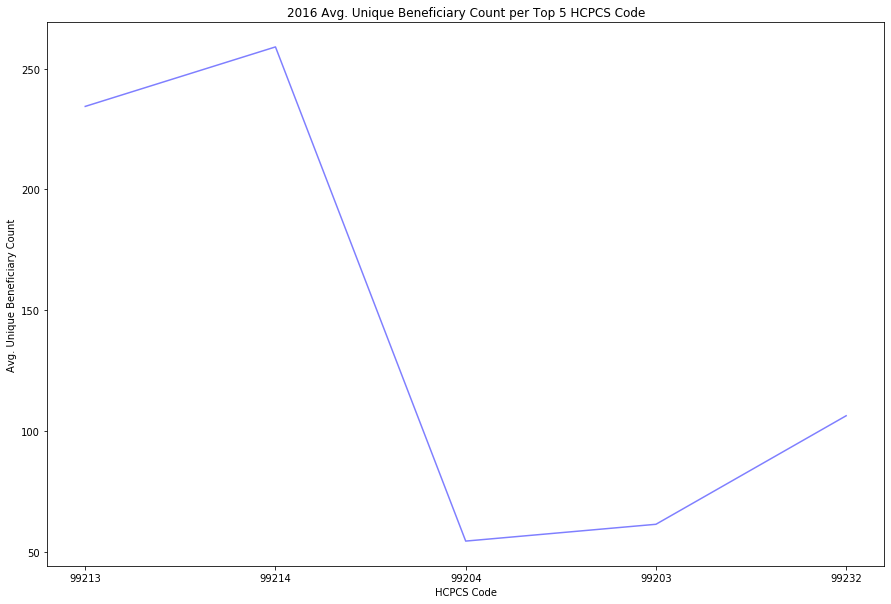

In [23]:
#line

plt.figure(figsize=(15,10))

plt.plot(count_plots.hcpcs_code, count_plots.code_bene_cnt_avg, c='blue', alpha=0.5)

plt.title('2016 Avg. Unique Beneficiary Count per Top 5 HCPCS Code')
plt.xlabel('HCPCS Code')
plt.ylabel('Avg. Unique Beneficiary Count')
#plt.legend(loc="lower right")
plt.show()

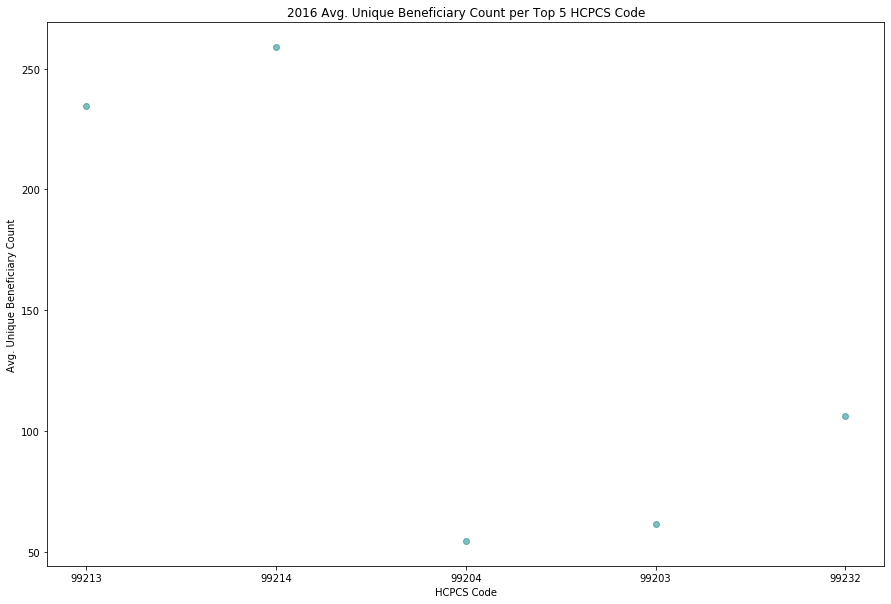

In [24]:
#scatter

plt.figure(figsize=(15,10))

plt.scatter(count_plots.hcpcs_code, count_plots.code_bene_cnt_avg, c='teal', alpha=0.5)

plt.title('2016 Avg. Unique Beneficiary Count per Top 5 HCPCS Code')
plt.xlabel('HCPCS Code')
plt.ylabel('Avg. Unique Beneficiary Count')
#plt.legend(loc="lower right")
plt.show()